In [11]:
import flocpy
import os
import glob
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

### Preparing the data

The floc identification software operates on a sorted list of images. Each element in the list should be a full path to an image file.

In [2]:
paths = flocpy.testdata_paths()
imgset1_flist = glob.glob(os.path.join(paths[0], '*.bmp')) # image set 1
imgset2_flist = glob.glob(os.path.join(paths[1], '*.png')) # image set 2

print(imgset1_flist[0])

c:\users\tashl\onedrive\documents\github\flocpy\flocpy\testdata\imgset1\023.bmp


If the files are conveniently named, you can use

    sorted_flist = sorted(flist)

In [3]:
sorted_flist_1 = sorted(imgset1_flist)

for f in sorted_flist_1:
    print(os.path.basename(f))

023.bmp
024.bmp
025.bmp
026.bmp
027.bmp
028.bmp
029.bmp
030.bmp


Otherwise, it's best to define a custom function to facilitate sorting. In this case, we sort by a date and time encoded in the filename.

In [4]:
def custom_datetime(fpath):
    dtprefix = 'img-'
    i0 = len(dtprefix)
    dtlen = 14
    fmt = '%m%d%Y%H%M%S'
    return dt.datetime.strptime(os.path.basename(fpath)[i0:i0+dtlen],fmt)

sorted_flist_2 = sorted(imgset2_flist, key=custom_datetime)

for f in sorted_flist_2:
    print(os.path.basename(f))

img-11112021213304-11274.png
img-11112021213314-11275.png
img-11112021213325-11276.png
img-11112021213335-11277.png
img-11112021213345-11278.png
img-11112021213356-11279.png
img-11112021213406-11280.png
img-11112021213416-11281.png


### Running the floc identification algorithm

To perform the analysis, use the identify_flocs function.

Required arguments:
* **flist**: A sorted list of flocs (created above)

Optional arguments:
* **resolution**: A scale factor for the pixels. In these examples, there are 0.95 microns per pixel.
* **min_area**: Ignores flocs that are smaller than a specified area (in specified units). The default value of zero will save all flocs regardless of size
* **max_edgewidth**: A threshold parameter for identifying out of focus flocs. Quantifies the distance over which the transition from bacgkround color to floc color is spread averaged over the perimeter of the floc. Shorter edgewidths are more focused. The default value of Inf will save all flocs regardless of focus
* **extra_params**: A list of parameters to save in addition to area and edgewidth. See the documentation for skimage.measure.regionprops for a list of options.
* **index**: Choose which images in the list to process. Default value is None, which will process all images. If index is an integer, only one image is processed and the function returns relevant outputs. If index is a list of integers or None, function returns None
* **save**: Boolean, if true, output is saved as .csv files that are named identically to images
* **return_data**: Boolean, if True, results are returned as a list of floc objects. Note that this will cause memory issues if analyzing more than a few images
* **njobs**: int, how many cores to use simultaneously. If njobs>1, parallel processing is performed using joblib
* **report_progress**: Boolean. True prints progress to console.


In [13]:
out1 = flocpy.identify_flocs(sorted_flist_1,
                            resolution=0.95, 
                            min_area=0, 
                            max_edgewidth=np.inf,
                            extra_params=[], 
                            index=None,
                            save=False,            # output included with package
                            return_data=True,
                            n_jobs=2,
                            report_progress=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=2)]: Done   6 out of   8 | elapsed:    9.4s remaining:    3.1s
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   10.9s finished


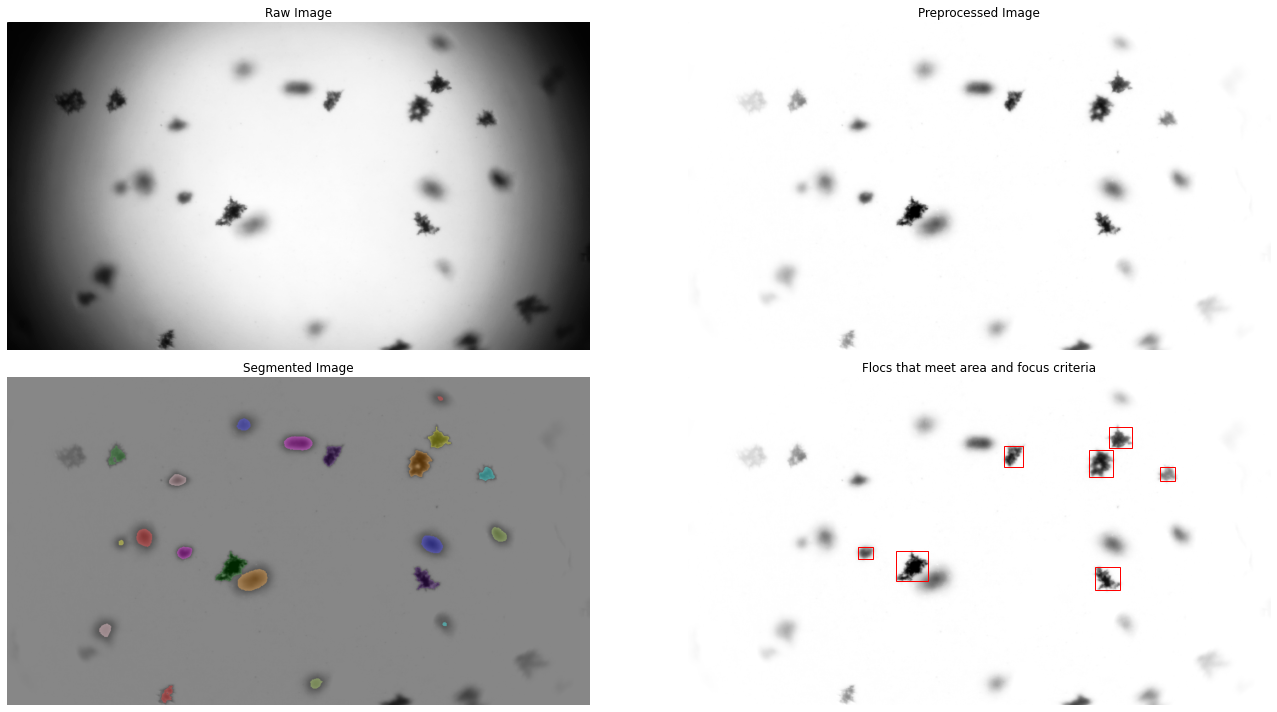

In [53]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=2)
ax[0,0].axis('off')
ax[1,0].axis('off')
ax[0,1].axis('off')
ax[1,1].axis('off')

imgix = 4

ax[0,0].set_title('Raw Image')
out1[imgix].plot_segmentation(ax[0,0], min_area=100, max_edgewidth=10, use_raw_img=True, show_overlay=False, show_boxes=False, 
                         box_color='k', box_thickness=1)

ax[0,1].set_title('Preprocessed Image')
out1[imgix].plot_segmentation(ax[0,1], min_area=100, max_edgewidth=10, use_raw_img=False, show_overlay=False, show_boxes=False, 
                         box_color='k', box_thickness=1)

ax[1,0].set_title('Segmented Image')
out1[imgix].plot_segmentation(ax[1,0], min_area=100, max_edgewidth=10, use_raw_img=False, show_overlay=True, show_boxes=False, 
                         box_color='k', box_thickness=1)


ax[1,1].set_title('Flocs that meet area and focus criteria')
out1[imgix].plot_segmentation(ax[1,1], min_area=100, max_edgewidth=12, use_raw_img=False, show_overlay=False, show_boxes=True, 
                         box_color='r', box_thickness=1)

plt.tight_layout()

plt.savefig('C:\\users\\tashl\\onedrive\\desktop\\example.png')

In [54]:
out2 = flocpy.identify_flocs(sorted_flist_2,
                            resolution=0.95, 
                            min_area=0, 
                            max_edgewidth=np.inf,
                            extra_params=[], 
                            index=None,
                            save=False,                  # output included with package
                            return_data=True,
                            n_jobs=2,
                            report_progress=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   13.7s


KeyboardInterrupt: 

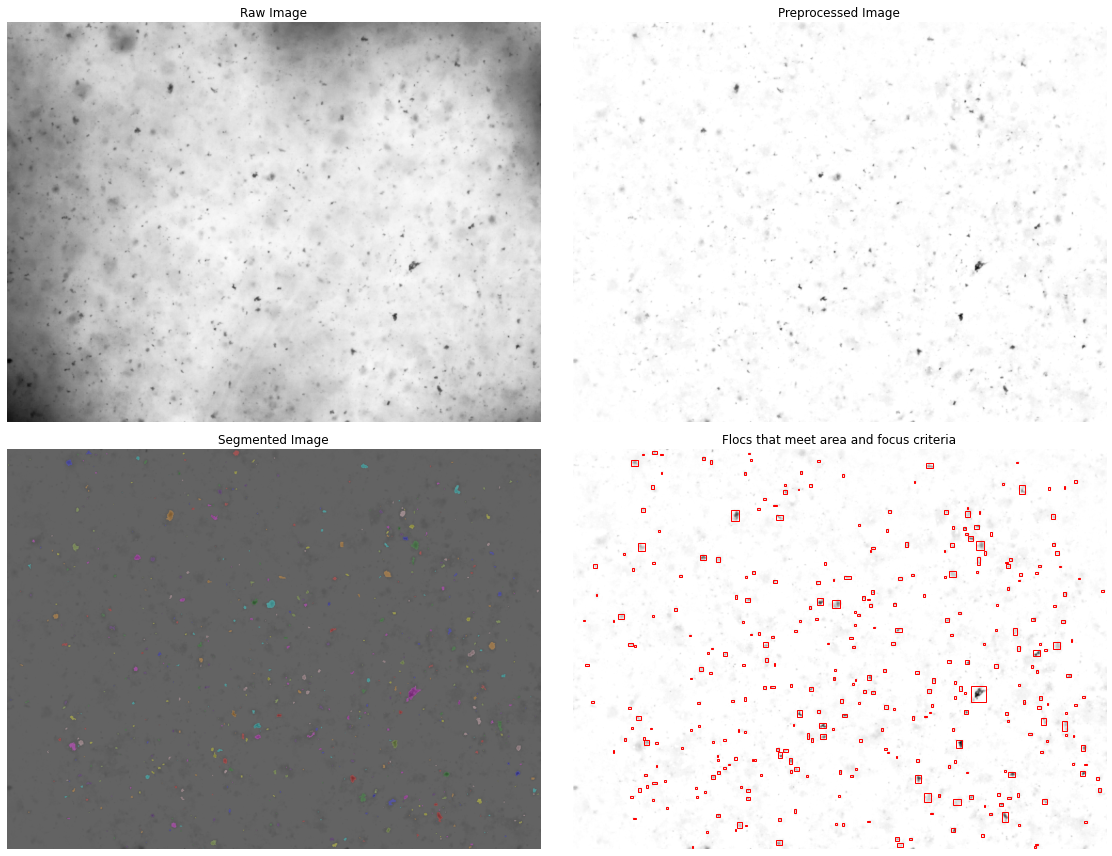

In [47]:
fig, ax = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
ax[0,0].axis('off')
ax[1,0].axis('off')
ax[0,1].axis('off')
ax[1,1].axis('off')

ax[0,0].set_title('Raw Image')
out2[1].plot_segmentation(ax[0,0], min_area=100, max_edgewidth=10, use_raw_img=True, show_overlay=False, show_boxes=False, 
                         box_color='k', box_thickness=1)

ax[0,1].set_title('Preprocessed Image')
out2[1].plot_segmentation(ax[0,1], min_area=100, max_edgewidth=10, use_raw_img=False, show_overlay=False, show_boxes=False, 
                         box_color='k', box_thickness=1)

ax[1,0].set_title('Segmented Image')
out2[1].plot_segmentation(ax[1,0], min_area=100, max_edgewidth=10, use_raw_img=False, show_overlay=True, show_boxes=False, 
                         box_color='k', box_thickness=1)


ax[1,1].set_title('Flocs that meet area and focus criteria')
out2[1].plot_segmentation(ax[1,1], min_area=100, max_edgewidth=12, use_raw_img=False, show_overlay=False, show_boxes=True, 
                         box_color='r', box_thickness=1)

plt.tight_layout()

In [ ]:
#%%
fpath = 'E:\\'
folders = glob.glob('E:\\*/')[4:16]

#%%
def runspec(flist, tlist, path, mew):
    Lf = 2000
    w_window = 4000 * 0.95
    l_window = 3000 * 0.95
    Awin = w_window * l_window
    
    rhos_mgl = 2650000 #mg/l
    
    flocdata = FlocData(flist, tlist, min_floc_size=10, max_edgewidth=mew, 
                        sediment_density=rhos_mgl, primary_particle_size=5, 
                        fractal_dimension=2.4, frame_area=Awin, focal_range=Lf)
    
    out = flocdata.get_flocstats_table(percentile=[16, 50, 84], 
                                       method='count', minflocs=1000)
    df = pd.DataFrame(out)
    df.columns = ['datetime', 'Cs (mg/l)', 'Df_16 (microns)', 'Df_50 (microns)',
                  'Df_84 (microns)']
    df.set_index('datetime', inplace=True)
    df.index = df.index - dt.timedelta(seconds=toffset)
    return df


#%%

smew = [5,5,5,5,7,7,7,7,5,5,5, 5]
bmew = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

for i in [11,]:#len(folders)):
    
    folder = folders[i]
    
    if i<2:
        sprefix = 'side_img-'
        bprefix = 'bed_img-'
        toffset = 135
        
    else:
        sprefix = bprefix = 'img--'
        toffset=0
    
    
    datefun = lambda x: custom_datetime(x, sprefix)
    print('Running\t'+folder+'\t side floc cam\t\t\t\t\t\n')
    flist = filesorter(folder+'side_floc_cam', '.csv', datefun)
    tlist = [custom_datetime(fname, sprefix) for fname in flist]
    sdf = runspec(flist, tlist, toffset, smew[i])
    sdf.to_csv(folder+'sideflocs.csv')
    
    datefun = lambda x: custom_datetime(x, bprefix)
    print('Running\t'+folder+'\t bed floc cam\t\t\t\t\t\n')
    flist = filesorter(folder+'bed_floc_cam', '.csv', datefun)
    tlist = [custom_datetime(fname, bprefix) for fname in flist]
    bdf = runspec(flist, tlist, toffset, bmew[i])
    bdf.to_csv(folder+'bedflocs.csv')
    

